In [4]:
# Importing Basic Libraries
import warnings as w
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
w.filterwarnings('ignore')


In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)


In [6]:
# Reading the data
df = pd.read_csv(r"C:\Users\ds12\ML Assign\Data Sets\MLK\USA_Housing.csv")
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.459,5.683,7.009,4.090,23086.801,1059033.558,"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101"
1,79248.642,6.003,6.731,3.090,40173.072,1505890.915,"188 Johnson Views Suite 079\nLake Kathleen, CA 48958"
2,61287.067,5.866,8.513,5.130,36882.159,1058987.988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489"
3,63345.240,7.188,5.587,3.260,34310.243,1260616.807,USS Barnett\nFPO AP 44820
4,59982.197,5.041,7.839,4.230,26354.109,630943.489,USNS Raymond\nFPO AE 09386


In [7]:
# Exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,68583.109,5.977,6.988,3.981,36163.516,1232072.654
std,10657.991,0.991,1.006,1.234,9925.650,353117.627
min,17796.631,2.644,3.236,2.000,172.611,15938.658
25%,61480.562,5.322,6.299,3.140,29403.929,997577.135
50%,68804.286,5.970,7.003,4.050,36199.407,1232669.378
75%,75783.339,6.651,7.666,4.490,42861.291,1471210.204
max,107701.748,9.519,10.760,6.500,69621.713,2469065.594


In [9]:
# Checking for null values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [10]:
# Dropping the Address column
df.drop("Address", axis=1, inplace=True)


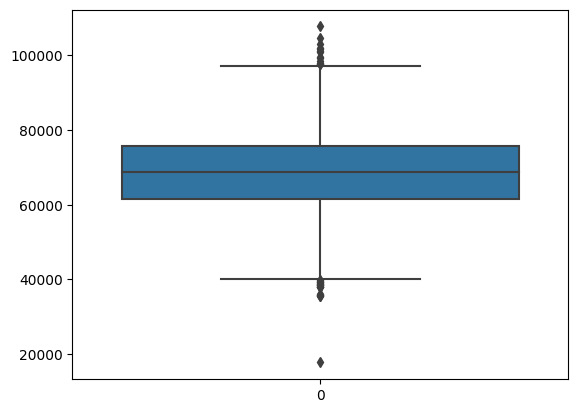

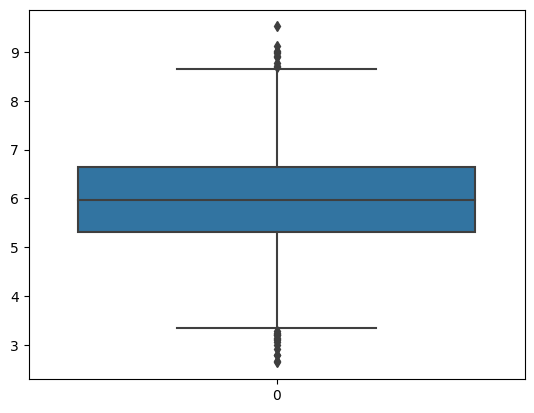

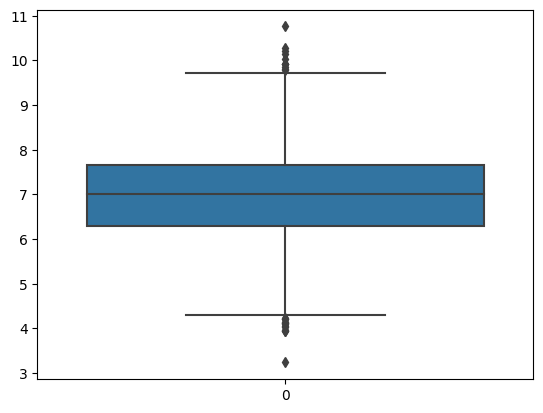

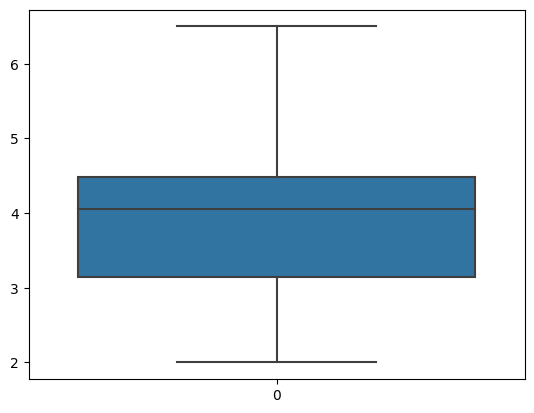

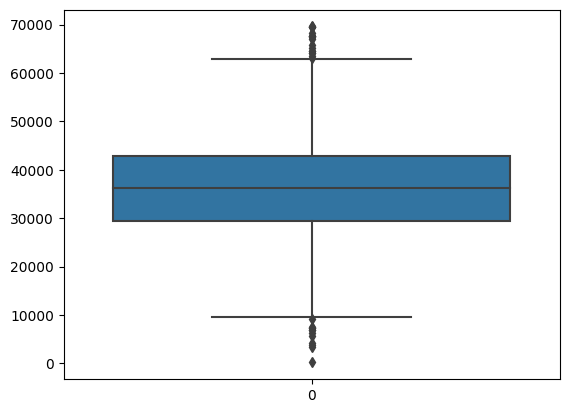

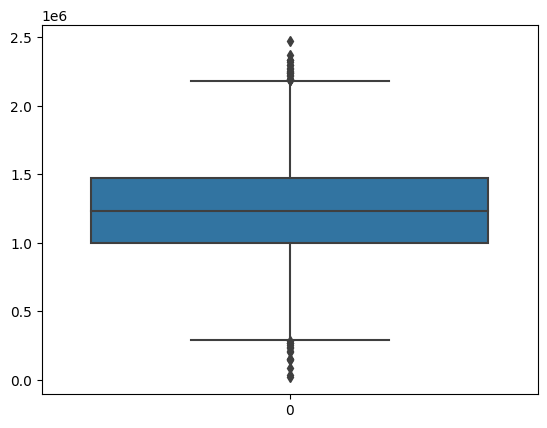

In [11]:
# Checking for outliers
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [12]:
# Removing outliers using Inter Quartile Range of every column
for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    df = df[(df[i] > low) & (df[i] < high)]

In [13]:
# Removing outliers
from scipy.stats import zscore

z = np.abs(zscore(df))
df = df[(z < 3).all(axis=1)]


In [14]:
# Checking for skewness
df.skew()

Avg. Area Income               -0.023
Avg. Area House Age             0.005
Avg. Area Number of Rooms      -0.052
Avg. Area Number of Bedrooms    0.373
Area Population                 0.032
Price                          -0.010
dtype: float64

In [15]:
# Removing skewness
for i in df.columns:
    if df[i].skew() > 0.55:
        df[i] = np.log1p(df[i])
    if df[i].skew() < -0.55:
        df[i] = np.square(df[i])


In [16]:
# Changing the data type of Avg. Area Number of Rooms and Avg. Area Number of Bedrooms
df[["Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms"]] = df[
    ["Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms"]
].astype("int64")


In [17]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.459,5.683,7,4,23086.801,1059033.558
1,79248.642,6.003,6,3,40173.072,1505890.915
2,61287.067,5.866,8,5,36882.159,1058987.988
3,63345.240,7.188,5,3,34310.243,1260616.807
4,59982.197,5.041,7,4,26354.109,630943.489
...,...,...,...,...,...,...
4995,60567.944,7.830,6,3,22837.361,1060193.786
4996,78491.275,6.999,6,4,25616.115,1482617.729
4997,63390.687,7.251,4,2,33266.145,1030729.583
4998,68001.331,5.534,7,5,42625.620,1198656.872


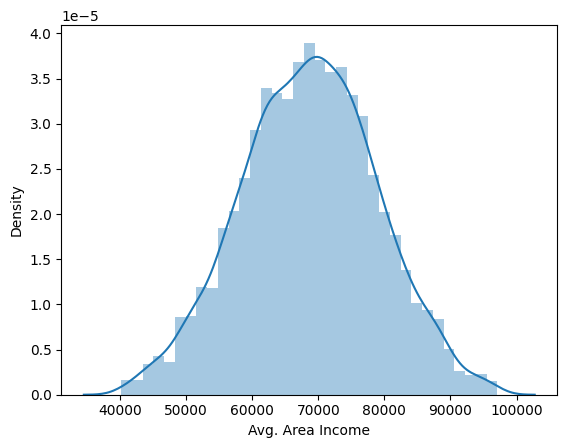

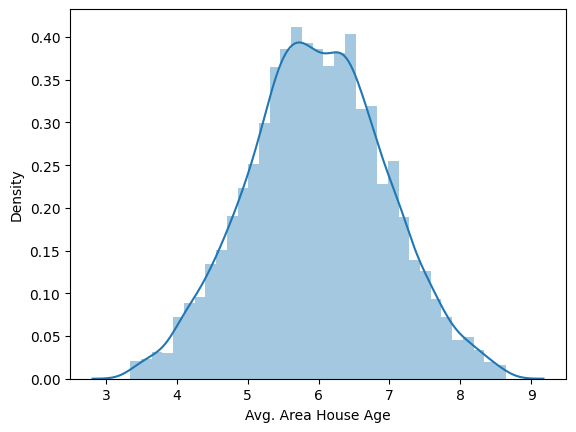

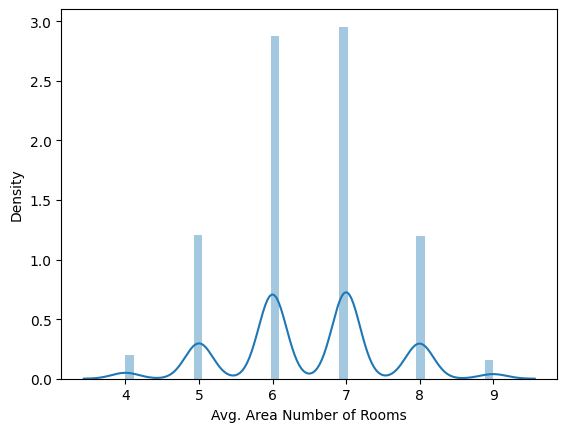

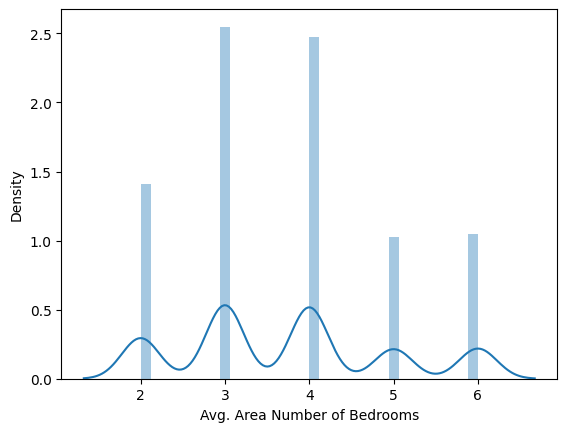

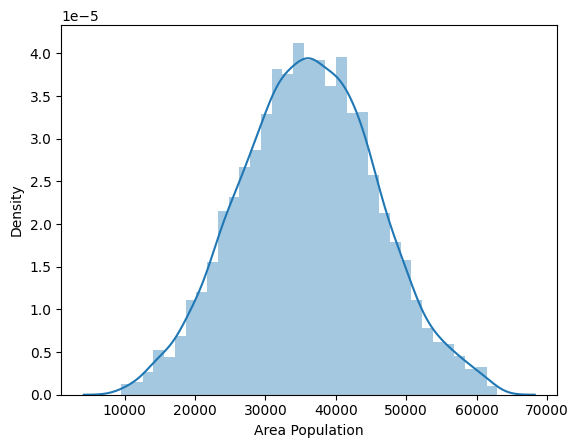

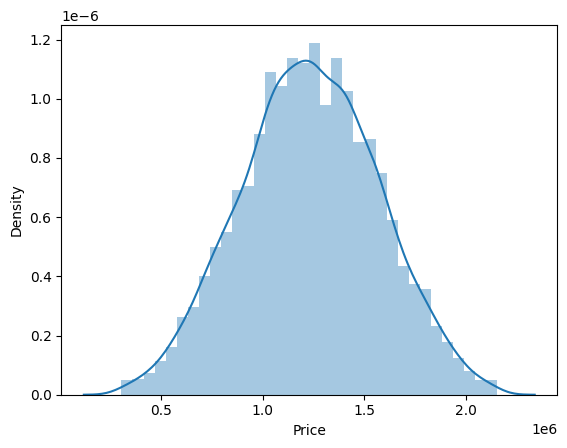

In [18]:
# Plotting the data distribution
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

<Axes: >

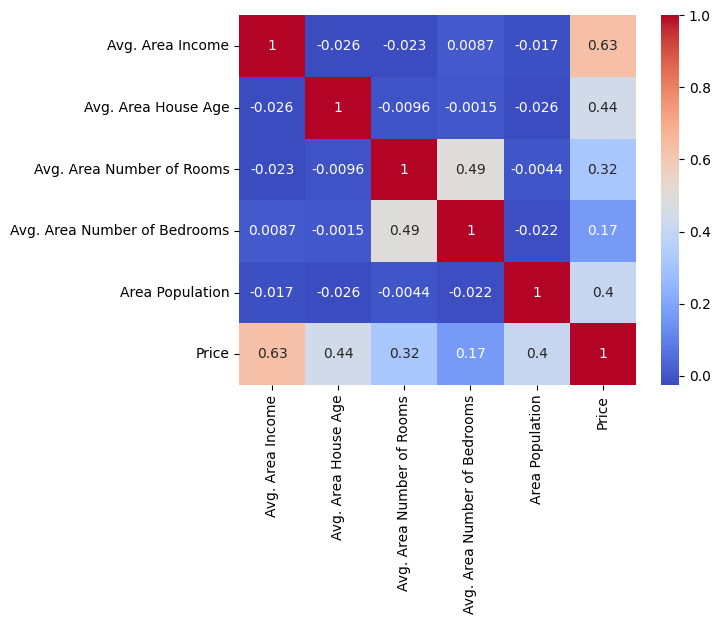

In [26]:
# Printing the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# Modeling

In [19]:
# Splitting the data into X and y
X = df.drop("Price", axis=1)
y = df[["Price"]]


In [20]:
# Getting feature list who have unique values more than 10
feature_list = [feature for feature in X.columns if X[feature].nunique() > 10]
feature_list


['Avg. Area Income', 'Avg. Area House Age', 'Area Population']

In [21]:
# Splitting the data into train and test
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling the data

sc = StandardScaler()
SCX_train = X_train.copy(deep=True)
SCX_test = X_test.copy(deep=True)
SCX_train[feature_list] = sc.fit_transform(SCX_train[feature_list])
SCX_test[feature_list] = sc.transform(SCX_test[feature_list])


In [22]:
# Importing the Regression Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Importing the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Making a list of tuples model name and models
model_list = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor(n_estimators=200)),
    ("KNN", KNeighborsRegressor()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(verbosity=0)),
    ("CatBoost", CatBoostRegressor(verbose=0)),
]


## Model Building on Original Data

In [23]:
# Making a dataframe to store metrics and comparing the models
df_metrics = pd.DataFrame(columns=["Model", "R2 Score", "RMSE", "MAE"])

# Fitting the models and storing the metrics
for name, model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df_metrics = df_metrics.append(
        {
            "Model": name,
            "R2 Score": r2_score(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "MAE": mean_absolute_error(y_test, y_pred),
        },
        ignore_index=True,
    )

# Comparing the models
df_metrics.sort_values(by="R2 Score", ascending=False)


,Model,R2 Score,RMSE,MAE,MSE
0,Linear Regression,0.897,104795.341,84459.323,10982063410.317
6,CatBoost,0.887,109579.215,88738.447,12007604458.537
2,Random Forest,0.861,121774.245,97100.919,14828966661.412
5,XGBoost,0.859,122642.155,98515.555,15041098237.996
1,Decision Tree,0.706,176901.926,141947.780,31294291401.096
3,KNN,0.455,240951.834,191141.307,58057786169.715
4,SVR,-0.001,326365.420,261292.022,106514387490.398


In [24]:
# Making a dataframe to store metrics and comparing the models
df_metrics = pd.DataFrame(columns=["Model", "R2 Score", "RMSE", "MAE"])

# Fitting the models and storing the metrics
for name, model in model_list:
    model.fit(SCX_train, y_train)
    y_pred = model.predict(SCX_test)
    df_metrics = df_metrics.append(
        {
            "Model": name,
            "R2 Score": r2_score(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "MAE": mean_absolute_error(y_test, y_pred),
        },
        ignore_index=True,
    )

# Comparing the models
df_metrics.sort_values(by="R2 Score", ascending=False)


,Model,R2 Score,RMSE,MAE,MSE
0,Linear Regression,0.897,104795.341,84459.323,10982063410.316
6,CatBoost,0.887,109467.478,88693.205,11983128658.583
2,Random Forest,0.860,121906.700,97399.406,14861243503.979
5,XGBoost,0.859,122642.155,98515.555,15041098237.996
3,KNN,0.833,133420.133,106440.754,17800931909.361
1,Decision Tree,0.710,175580.713,139050.065,30828586726.652
4,SVR,-0.000,326340.890,261270.027,106498376325.964


R2 Score: 0.7057776036169616
RMSE: 176977.71261536374
MAE: 140983.90366210652
MSE: 31321110762.566277


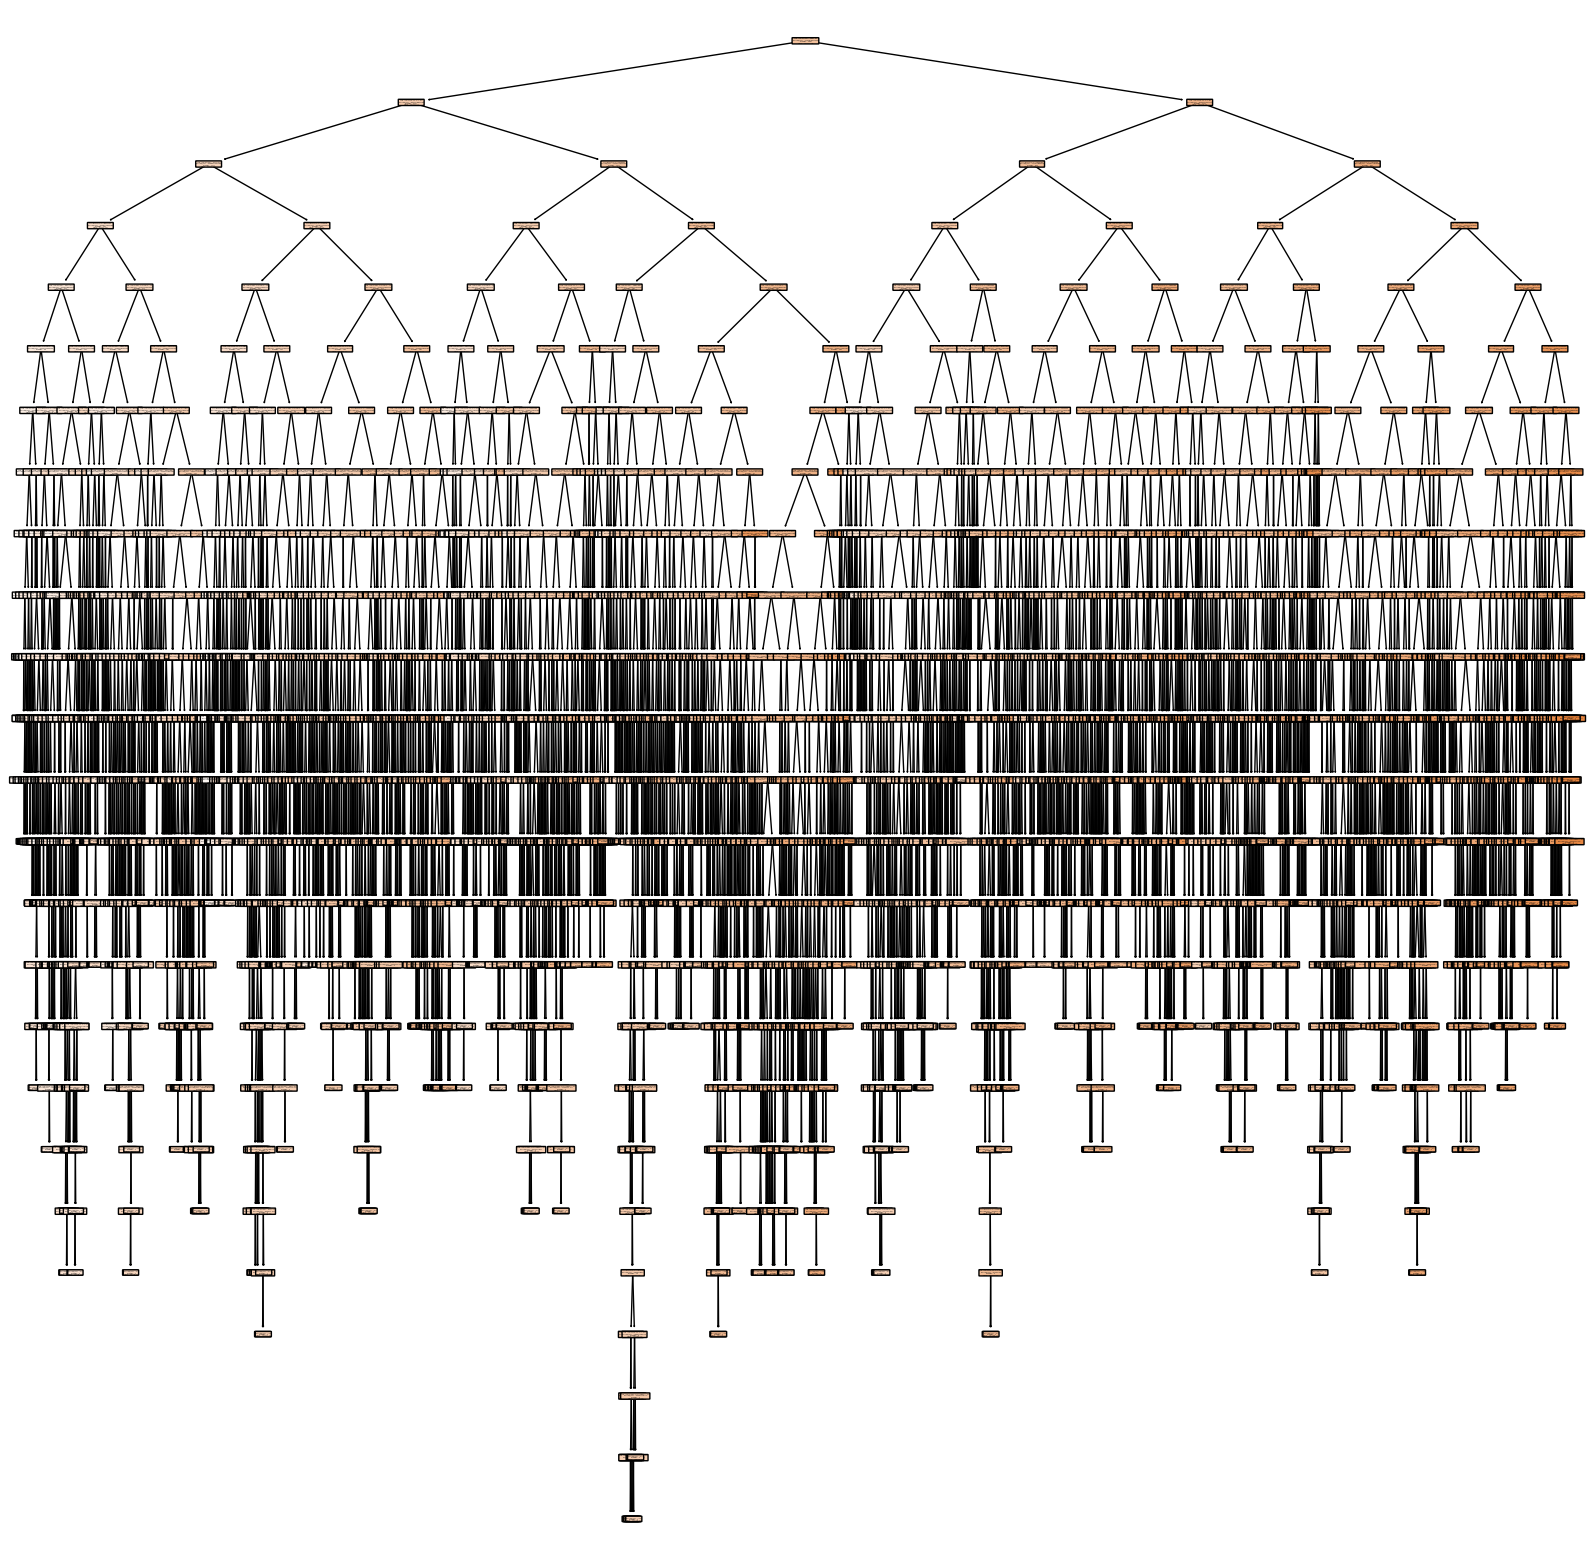

In [27]:
# Creating model with Decision Tree

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Checking the metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

## Plotting Tree for the model

from sklearn.tree import plot_tree

# Plottting only the first tree

plt.figure(figsize=(20, 20))
plot_tree(dt, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()